# Project: Investigate The Movie Database (TMDB) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:
tmdb_df = pd.read_csv('tmdb-movies.csv')

### Data Cleaning

In [5]:
# look for the shape of our database
tmdb_df.shape
# we have 10866 rows and 21 columns
# meaning, we have 10866 samples and 21 features

(10866, 21)

Let's explore the data for few minutes, see what are the columns and how they are useful

In [7]:
tmdb_df.head() # Displays the top 5 samples of our dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We may see that, in jupyter notebook, most of the columns in the middle do not show up. 
What I am doing is, printing the transpose of the dataset to have a look at all the columns

In [8]:
tmdb_df.head().T # printing transpose of top 5 samples

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


In [10]:
# Print all the present columns in the dataset
tmdb_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [17]:
# get the general statistics of dataset
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


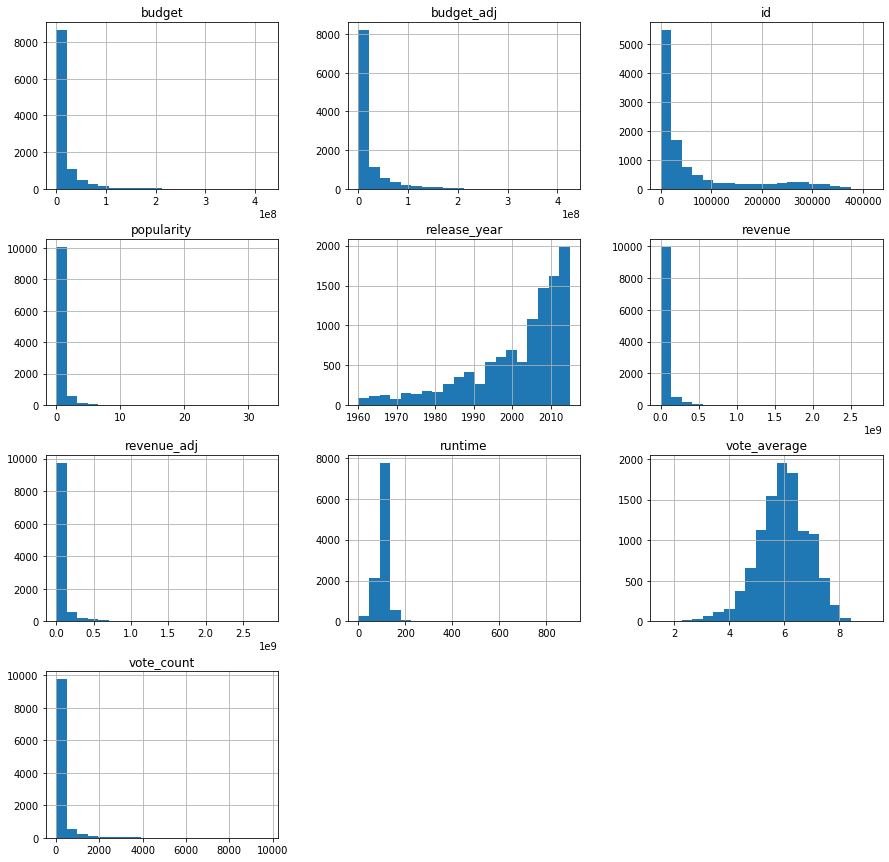

In [23]:
# we can also plot the histogram of these values

tmdb_df.hist(bins=20, figsize=(15,15));

In [32]:
# check for datatypes
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [18]:
# check for null values
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
# Check for null values
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There seems to be enough null values present there. 

In such cases, we have 2 options (in general)
* Remove all the samples/rows which has null values in it
* Impute the cells with some values in it (generally mean or median)

In [33]:
# BEFORE REMOVING NULL VALUES, 
# We Will delete the columns which will not contribute significantly to our insights

cols_to_delete = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'production_companies', 'overview']

tmdb_df.drop(cols_to_delete, axis=1, inplace=True)

#### Lets look at the some records which has null values, to see if they have any same characteristics

In [35]:
# Check for null values
tmdb_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Now, these movies seems to be the movies which are not available on the movie database, or are yet to be released.
We will just drop this records from our dataset

In [37]:
# We can remove these null values, as we have lots of the data and
# it will not effect much on removing these

tmdb_df.dropna(inplace=True)

In [39]:
# checking for current shape
tmdb_df.shape

(10732, 14)

In [40]:
# confirming the removal of null values
tmdb_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [68]:
# check for duplicate rows
tmdb_df.duplicated().sum()

1

In [69]:
# drop duplicates
tmdb_df.drop_duplicates(inplace=True)

THAT'S AWESOME.!!

<a id='eda'></a>
## Exploratory Data Analysis

1. Which year has the highest release of movies?
2. Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?
3. Movie with Highest And Lowest Budget?
4. Which movie made the highest revenue and lowest as well?
5. Movie with shorest and longest runtime?
6. Which movie get the highest or lowest votes (Ratings).
7. Which Year Has The Highest Profit Rate?
8. Which length movies most liked by the audiences according to their popularity?
9. Average Runtime Of Movies From Year To Year?
10. How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?
11. Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?
12. Which Genre Has The Highest Release Of Movies?
13. Which genres are most popular from year to year?
15. Most Frequent star cast?
14. Top 20 Production Companies With Higher Number Of Release?
15. Life Time Profit Earn By Each Production Company?
16. Top 20 Director Who Directs Maximum Movies?
17. Most Popular Keyword?
18. What kinds of properties are associated with movies that have high revenues?

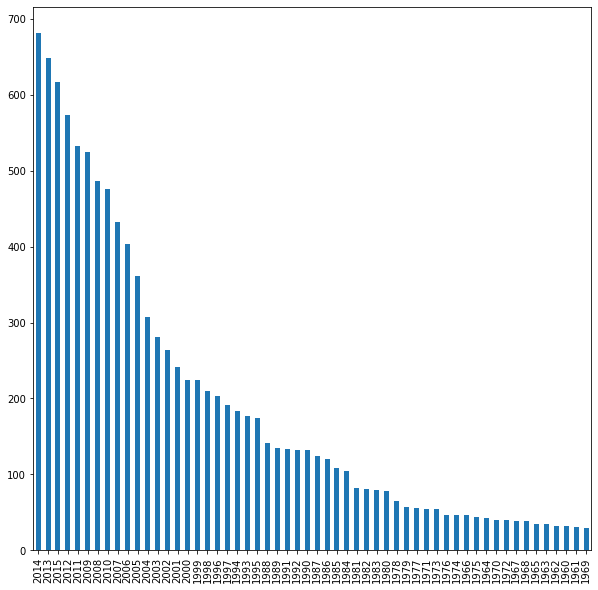

In [56]:
# Q1. Which year has the highest release of movies?
year_relase = tmdb_df.release_year.value_counts()
year_relase.plot(kind='bar', figsize=(10,10))

2014 had the most released movies with 682 movies released in that year

In [67]:
# Which Movie Has The Highest Or Lowest Profit? 
minimum_profit = (tmdb_df.revenue).max()
minimum_profit = (tmdb_df.revenue).min()

min_profit_movie = tmdb_df[(tmdb_df.revenue - tmdb_df.budget)==minimum_profit]
max_profit_movie = tmdb_df[]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010,425000000.0,11087569.0


In [ ]:
# Top 10 movies which earn highest profit?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!